### Exercise
You are given *UScereal.csv* which contains nutritional and Marketing Information on US Cereals. The data come from the 1993 ASA Statistical Graphics Exposition, and are taken from the mandatory F&DA food label. You need to examine the `fibre` and do following: \
(1) Identify the outliers using Boxplot and Histogram  \
(2) Remove the outliers using 3𝜎 rule first  \
(3) After removing outliers in previous step, you get a new dataframe.  \
(4) On the dataframe, use IQR Score to remove outliers  \
(5) Plot histogram for new dataframe that is generated after step (4). Also plot bell curve on same histogram  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("data/UScereal.csv")

<AxesSubplot:xlabel='fibre'>

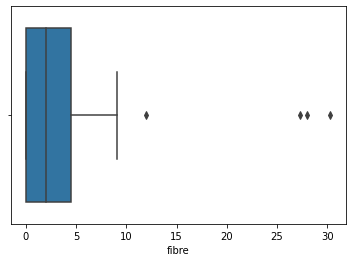

In [3]:
sns.boxplot(data = df, x='fibre')

<AxesSubplot:xlabel='fibre', ylabel='Count'>

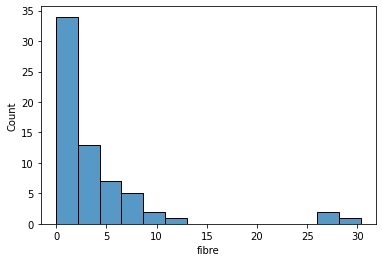

In [4]:
sns.histplot(data = df, x='fibre')

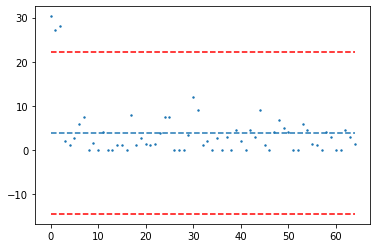

In [5]:
x = np.arange(len(df))
y = df['fibre']
plt.plot(x, y.mean()+x*0, '--')
plt.plot(x, y.mean()-3*y.std()+x*0, '--',c='r')
plt.plot(x, y.mean()+3*y.std()+x*0, '--', c='r')
plt.scatter(x, y,s=2)

In [6]:
#Set Threshold
threshold  = df['fibre'].std()*3
threshold

18.400211780706478

In [7]:
#Adjust DF
outliers_df = df[df['fibre'] < threshold]
outliers_df.shape

(62, 11)

In [8]:
#Now removing outliers from outliers_df using IQR
# Calculate the IQR
q3 = outliers_df['fibre'].quantile(0.75)
q1 = outliers_df['fibre'].quantile(0.25)
IQR = q3 - q1
# Apply Upper and Lower Bound
upper_range = q3 + 1.5*IQR
bottom_range = q1 - 1.5*IQR
print(upper_range, bottom_range)

10.0 -6.0


In [9]:
iqr_outliers_df = outliers_df[outliers_df['fibre'] < upper_range]
iqr_outliers_df3 = iqr_outliers_df[iqr_outliers_df['fibre'] > bottom_range]
iqr_outliers_df3

,mfr,calories,protein,fat,sodium,fibre,carbo,sugars,shelf,potassium,vitamins
3,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,1,93.33333,enriched
4,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,2,30.00000,enriched
5,G,173.33333,4.000000,2.666667,280.00000,2.666667,24.00000,10.666667,3,133.33333,enriched
6,R,134.32836,2.985075,1.492537,298.50746,5.970149,22.38806,8.955224,1,186.56716,enriched
7,P,134.32836,4.477612,0.000000,313.43284,7.462687,19.40299,7.462687,3,283.58209,enriched
...,...,...,...,...,...,...,...,...,...,...,...
60,G,146.66667,2.666667,1.333333,333.33333,0.000000,28.00000,4.000000,3,80.00000,enriched
61,G,110.00000,1.000000,1.000000,140.00000,0.000000,13.00000,12.000000,2,25.00000,enriched
62,R,149.25373,4.477612,1.492537,343.28358,4.477612,25.37313,4.477612,1,171.64179,enriched
63,G,100.00000,3.000000,1.000000,200.00000,3.000000,17.00000,3.000000,1,110.00000,enriched


<AxesSubplot:xlabel='fibre', ylabel='Count'>

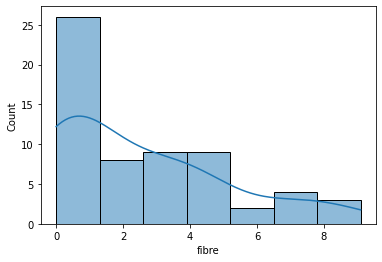

In [10]:
sns.histplot(data = iqr_outliers_df3, x='fibre', kde=True)